(100, 4001)
(100, 1)
(4001,)
[-10.     -9.995  -9.99  ...,   9.99    9.995  10.   ]
[[ 0.1    0.111  0.122  0.133  0.144  0.155  0.166  0.177  0.188  0.199
   0.21   0.221  0.232  0.243  0.254  0.265  0.276  0.287  0.298  0.309
   0.32   0.331  0.342  0.353  0.364  0.375  0.386  0.397  0.408  0.419
   0.43   0.441  0.452  0.463  0.474  0.485  0.496  0.507  0.518  0.529
   0.54   0.551  0.562  0.573  0.584  0.595  0.606  0.617  0.628  0.639
   0.65   0.661  0.672  0.683  0.694  0.705  0.716  0.727  0.738  0.749
   0.76   0.771  0.782  0.793  0.804  0.815  0.826  0.837  0.848  0.859
   0.87   0.881  0.892  0.903  0.914  0.925  0.936  0.947  0.958  0.969
   0.98   0.991  1.002  1.013  1.024  1.035  1.046  1.057  1.068  1.079
   1.09   1.101  1.112  1.123  1.134  1.145  1.156  1.167  1.178  1.189]]
[ 0.00023605  0.00023602  0.00023596 ...,  0.00023596  0.00023602
  0.00023605]
[ 0.375]
[ 0.98]
[ 1.189]


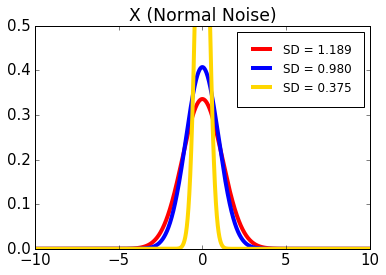

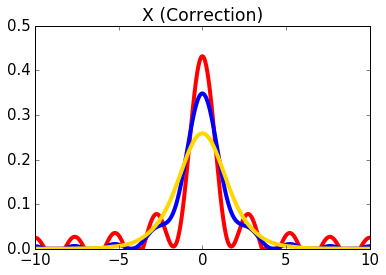

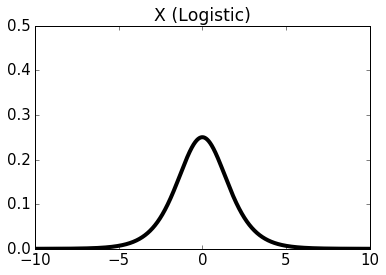

In [3]:
"""
I think I can use this to generate figures for the paper.
"""

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
import scipy.io
from bisect import bisect

# Load in Haoyu's matrices.
mat = scipy.io.loadmat('../generateXcorr/x_corr_plot.mat')
sdval = mat['sdval']
pdfs = mat['res']
x_corr = pdfs[0]
pdfs = pdfs[1:] # So now pdfs[0] is an actual distribution.

# Debugging
print(pdfs.shape)
print(sdval.shape)
print(x_corr.shape)
print(x_corr)
print(sdval.T)
print(pdfs[0].T)

# Pick the standard deviations we want to demonstrate via indexing.
new_pdfs1 = pdfs[25]
new_pdfs2 = pdfs[80]
new_pdfs3 = pdfs[99]
#new_pdf1 = np.concatenate((pdfs1[2001:],pdfs1[:2001]))
#new_pdf2 = np.concatenate((pdfs2[2001:],pdfs2[:2001]))
#new_pdf3 = np.concatenate((pdfs3[2001:],pdfs3[:2001]))
print(sdval[25])
print(sdval[80])
print(sdval[99])


# Now get back to normal. First, have the logistic function here.
def logistic(x):
    return np.exp(-x) / (1 + np.exp(-x))**2

x = np.linspace(-10,10,4001)
y_lim = 0.5

plt.figure()
plt.plot(x, norm.pdf(x, 0, 1.189), color='red',  lw=4, label="SD = 1.189")
plt.plot(x, norm.pdf(x, 0, 0.980), color='blue', lw=4, label="SD = 0.980")
plt.plot(x, norm.pdf(x, 0, 0.375), color='gold', lw=4, label="SD = 0.375")
plt.ylim([0,y_lim])
plt.title("X (Normal Noise)", size="xx-large")
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.legend(loc="upper right", borderpad=1)
plt.savefig("x_normal_noise.png", dpi=250)

plt.figure()
plt.plot(x_corr, new_pdfs3, lw=4, color='red', label="SD = 1.189")
plt.plot(x_corr, new_pdfs2, lw=4, color='blue', label="SD = 0.980")
plt.plot(x_corr, new_pdfs1, lw=4, color='gold', label="SD = 0.375")
plt.ylim([0,y_lim])
plt.title("X (Correction)", size="xx-large")
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
#plt.legend(loc="upper right", borderpad=1)
plt.savefig("x_correction.png", dpi=250)

# Finally, the logistic one (which stays the same throughout).
plt.figure()
plt.plot(x, logistic(x), color='k', lw=4)
plt.title("X (Logistic)", size="xx-large")
plt.ylim([0,y_lim])
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.savefig("x_logistic.png", dpi=250)